<a href="https://colab.research.google.com/github/SamayMody/Prediction-model/blob/main/Prediction_using_supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
import pandas as pd
import numpy as np
data_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
ds = pd.read_csv(data_url)
ds

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [302]:
ds.shape # Used to check Total number of rows and columns

(25, 2)

In [303]:
ds.head() # Displays first 5 rows details


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [304]:
ds.tail() # Displays last 5 rows details

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [305]:
ds.isna() # Used to check if there are any NULL values in the dataset

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [306]:
ds.isna().sum() # Displays total number of NULL values under each column

Hours     0
Scores    0
dtype: int64

In [307]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [308]:
ds.columns # Displays all the column's header

Index(['Hours', 'Scores'], dtype='object')

In [309]:
ds.nunique() # Shows the total number of unique values (i.e, The values thet are not repeating)

Hours     23
Scores    23
dtype: int64

In [310]:
ds['Hours'].unique()  # Displays the unique values of the column "Hours"

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [311]:
ds['Scores'].unique() # Displays the unique values of column "Scores"

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86])

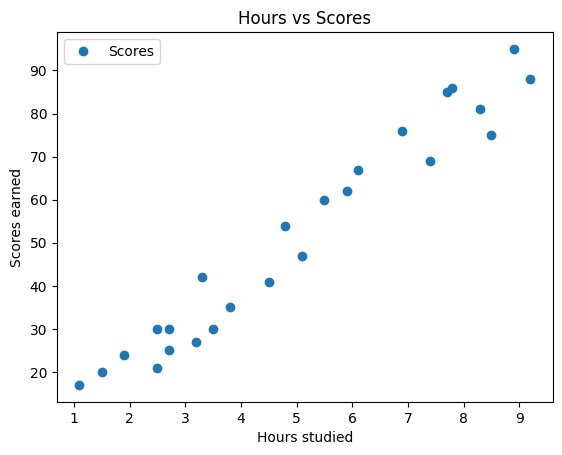

In [312]:
# Analysing the Scores through plotting the distribution

import matplotlib.pyplot as plt
ds.plot(x = "Hours" , y = "Scores" , style = 'o') # Assigning x and y variables with values
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Scores earned")
plt.show()

From the above graph we see that there is some kind of linear relation as as Hours studied is increasing the Scores earned is also increasing .

In [313]:
# Training and test splitting.
# It is the phase in which the data is trained according to the dataset provided.

from sklearn.model_selection import train_test_split

x = ds[['Hours']] # Defining x
y = ds['Scores'] # Defining y

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)
# 20% of data will be used for training and rest for testing purpose.

**Implementing Linear Regression Algorithm**

In [314]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train , y_train)

LinearRegression()

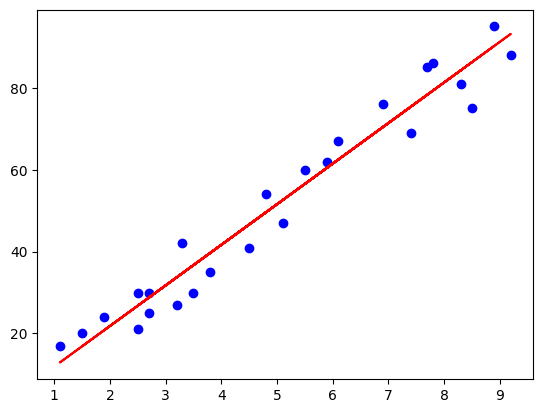

In [315]:
line = lin_reg.coef_*x + lin_reg.intercept_
# y = m*x + c
plt.scatter(x,y , color ="blue" )
plt.plot(x, line ,color ="red",)
plt.show()

In [316]:
# Testing the algorithm
print(x_test)
y_pred = lin_reg.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [317]:
# Creating a data frame of actual and predicted values
data_frame = pd.DataFrame({"Actual" : y_test , "Predicted" : y_pred})
data_frame

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [318]:
# Checking the score a student will get is he/she studys for x hours
hours = [[9.25]]
own_pred = lin_reg.predict(hours)
print("Number of hours studied : {}" .format(hours))
print("Predicted score : {}" .format(own_pred))

Number of hours studied : [[9.25]]
Predicted score : [93.69173249]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [319]:
# Checking the performance of the algorithm
from sklearn import metrics
print("Mean absolute error is : " , metrics.mean_absolute_error(y_test , y_pred))

Mean absolute error is :  4.183859899002982
